In [3]:
import pandas as pd # import pandas 
import os 
bookings = pd.read_csv("/Users/brindamunuswamy/Desktop/MIS581/h1Features.csv") # read CSV into pandas
bookings.head(15) #reading top 5 rows

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,different_assigned_room
0,0,342,2015,7,27,0,0,2,0.0,0,...,0,0,0,3,1,0,0.00,0,0,0
1,0,737,2015,7,27,0,0,2,0.0,0,...,0,0,0,4,1,0,0.00,0,0,0
2,0,7,2015,7,27,0,1,1,0.0,0,...,0,0,0,0,1,0,75.00,0,0,1
3,0,13,2015,7,27,0,1,1,0.0,0,...,0,0,0,0,1,0,75.00,0,0,0
4,0,14,2015,7,27,0,2,2,0.0,0,...,0,0,0,0,1,0,98.00,0,1,0
5,0,14,2015,7,27,0,2,2,0.0,0,...,0,0,0,0,1,0,98.00,0,1,0
6,0,0,2015,7,27,0,2,2,0.0,0,...,0,0,0,0,1,0,107.00,0,0,0
7,0,9,2015,7,27,0,2,2,0.0,0,...,0,0,0,0,1,0,103.00,0,1,0
8,1,85,2015,7,27,0,3,2,0.0,0,...,0,0,0,0,1,0,82.00,0,1,0
9,1,75,2015,7,27,0,3,2,0.0,0,...,0,0,0,0,1,0,105.50,0,0,0


In [4]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40060 entries, 0 to 40059
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     40060 non-null  int64  
 1   lead_time                       40060 non-null  int64  
 2   arrival_date_year               40060 non-null  int64  
 3   arrival_date_month              40060 non-null  int64  
 4   arrival_date_week_number        40060 non-null  int64  
 5   stays_in_weekend_nights         40060 non-null  int64  
 6   stays_in_week_nights            40060 non-null  int64  
 7   adults                          40060 non-null  int64  
 8   children                        40060 non-null  float64
 9   babies                          40060 non-null  int64  
 10  meal                            40060 non-null  int64  
 11  market_segment                  40060 non-null  int64  
 12  distribution_channel            

In [5]:
bookings.isnull().sum() # checking for null values 

is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
different_assigned_room           0
dtype: int64

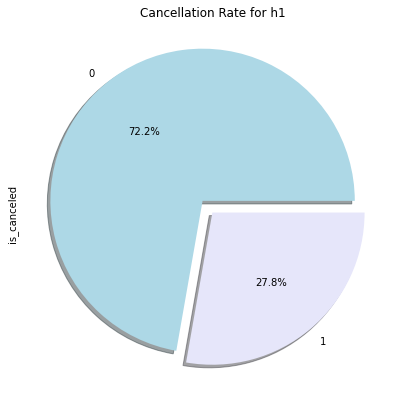

In [8]:
import matplotlib.pyplot as plt #benchmark cancellation rate for h1
piedata = bookings['is_canceled'].value_counts()
my_colors = ['lightblue','lavender'] # custom colors
my_explode = (0.1,0) # custom effects
plt.figure(figsize=(7,7)) #custom size for the pie chart
piedata.plot.pie(autopct="%.1f%%",colors=my_colors,explode=my_explode,shadow=True) #pie chart creation
plt.title("Cancellation Rate for h1")
plt.show() # displaying only chart without the extra information

In [9]:
X=bookings.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]] 
#seperating out the predictor variables into a dataframe
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40060 entries, 0 to 40059
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       40060 non-null  int64  
 1   arrival_date_year               40060 non-null  int64  
 2   arrival_date_month              40060 non-null  int64  
 3   arrival_date_week_number        40060 non-null  int64  
 4   stays_in_weekend_nights         40060 non-null  int64  
 5   stays_in_week_nights            40060 non-null  int64  
 6   adults                          40060 non-null  int64  
 7   children                        40060 non-null  float64
 8   babies                          40060 non-null  int64  
 9   meal                            40060 non-null  int64  
 10  market_segment                  40060 non-null  int64  
 11  distribution_channel            40060 non-null  int64  
 12  is_repeated_guest               

In [10]:
#X=X.astype({"children": int})

In [11]:
Y = bookings.iloc[:,[0]] # seperating out the dependent variable in a dataset
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40060 entries, 0 to 40059
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   is_canceled  40060 non-null  int64
dtypes: int64(1)
memory usage: 313.1 KB


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3) 
# splitting the predictor and dependent variable data sets ito 70-30 ratio of test and training data sets

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier() #default parameters without explanation
import numpy as np
rf.fit(X_train,np.ravel(Y_train))
# training the random forest classifier model using the training data set

RandomForestClassifier()

In [14]:
Y_pred=rf.predict(X_test) # predictions for test data set

In [15]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.50%


In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [90]:
rf_score = cross_val_score(rf, X, np.ravel(Y), cv=10, scoring='roc_auc') # eval random forest
print("Mean AUC Score - Random Forest: ", rf_score.mean()) # auc score for the model fit

Mean AUC Score - Random Forest:  0.35600897491302685


In [17]:
print(confusion_matrix(Y_test, Y_pred)) # confusion matrix for both classification classes 

[[8086  557]
 [1065 2310]]


In [18]:
print(classification_report(Y_test, Y_pred)) # classification report for the model 

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      8643
           1       0.81      0.68      0.74      3375

    accuracy                           0.87     12018
   macro avg       0.84      0.81      0.82     12018
weighted avg       0.86      0.87      0.86     12018



In [19]:
df = pd.DataFrame(data=Y_pred, columns=["Is_Canceled"])
df['Is_Canceled'].value_counts() # studying the predictions as a dataframe 

0    9151
1    2867
Name: Is_Canceled, dtype: int64

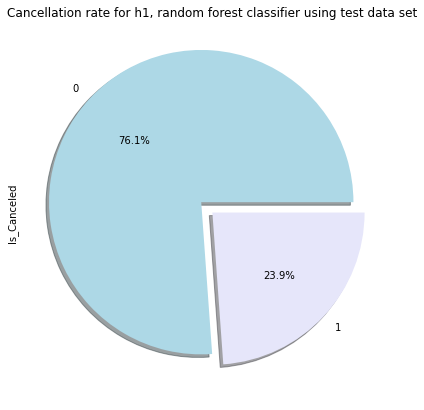

In [20]:
piedata = df['Is_Canceled'].value_counts()  # cancellation rate for pred based on test data set
my_colors = ['lightblue','lavender'] # custom colors
my_explode = (0.1,0) # custom effects
plt.figure(figsize=(7,7)) #custom size for the pie chart
piedata.plot.pie(autopct="%.1f%%",colors=my_colors,explode=my_explode,shadow=True) #pie chart creation
plt.title("Cancellation rate for h1, random forest classifier using test data set")
plt.show() # displaying only chart without the extra information

In [21]:
whatif_leadtime = X.copy() # what if analysis for lead time = 10 days
whatif_leadtime.loc[whatif_leadtime.lead_time !=745698745,"lead_time"] = 10
whatif_leadtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40060 entries, 0 to 40059
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       40060 non-null  int64  
 1   arrival_date_year               40060 non-null  int64  
 2   arrival_date_month              40060 non-null  int64  
 3   arrival_date_week_number        40060 non-null  int64  
 4   stays_in_weekend_nights         40060 non-null  int64  
 5   stays_in_week_nights            40060 non-null  int64  
 6   adults                          40060 non-null  int64  
 7   children                        40060 non-null  float64
 8   babies                          40060 non-null  int64  
 9   meal                            40060 non-null  int64  
 10  market_segment                  40060 non-null  int64  
 11  distribution_channel            40060 non-null  int64  
 12  is_repeated_guest               

In [22]:
whatif_leadtime['lead_time'].value_counts() # the altered data set where all records have lead time of 10 days

10    40060
Name: lead_time, dtype: int64

In [23]:
#whatif_leadtime=whatif_leadtime.astype({"lead_time": int})
whatif_leadtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40060 entries, 0 to 40059
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       40060 non-null  int64  
 1   arrival_date_year               40060 non-null  int64  
 2   arrival_date_month              40060 non-null  int64  
 3   arrival_date_week_number        40060 non-null  int64  
 4   stays_in_weekend_nights         40060 non-null  int64  
 5   stays_in_week_nights            40060 non-null  int64  
 6   adults                          40060 non-null  int64  
 7   children                        40060 non-null  float64
 8   babies                          40060 non-null  int64  
 9   meal                            40060 non-null  int64  
 10  market_segment                  40060 non-null  int64  
 11  distribution_channel            40060 non-null  int64  
 12  is_repeated_guest               

In [24]:
LT_pred = rf.predict(whatif_leadtime) # predictions for what-if data with lead time = 10

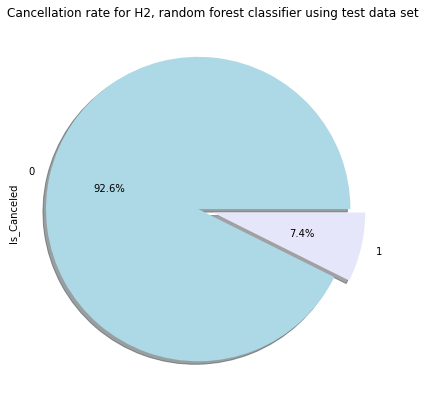

In [25]:
df = pd.DataFrame(data=LT_pred, columns=["Is_Canceled"])
df['Is_Canceled'].value_counts()
piedata = df['Is_Canceled'].value_counts()  # cancellation rate for pred based on test data set
my_colors = ['lightblue','lavender'] # custom colors
my_explode = (0.1,0) # custom effects
plt.figure(figsize=(7,7)) #custom size for the pie chart
piedata.plot.pie(autopct="%.1f%%",colors=my_colors,explode=my_explode,shadow=True) #pie chart creation
plt.title("Cancellation rate for H2, random forest classifier using test data set")
plt.show() # displaying only chart without the extra information

In [26]:
accuracy = metrics.accuracy_score(Y, LT_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.39%


In [27]:
whatif_channel = X.copy()
whatif_channel['distribution_channel'].value_counts()

4    28925
2     7865
1     3269
5        1
Name: distribution_channel, dtype: int64

In [28]:
whatif_channel.loc[whatif_channel.distribution_channel==1,"distribution_channel"] = 2
whatif_channel.loc[whatif_channel.distribution_channel==2,"distribution_channel"] = 2
whatif_channel.loc[whatif_channel.distribution_channel==3,"distribution_channel"] = 2
whatif_channel.loc[whatif_channel.distribution_channel==4,"distribution_channel"] = 2
whatif_channel.loc[whatif_channel.distribution_channel==5,"distribution_channel"] = 2

whatif_channel['distribution_channel'].value_counts()

2    40060
Name: distribution_channel, dtype: int64

In [29]:
#whatif_channel=whatif_channel.astype({"distribution_channel": int})
whatif_leadtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40060 entries, 0 to 40059
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       40060 non-null  int64  
 1   arrival_date_year               40060 non-null  int64  
 2   arrival_date_month              40060 non-null  int64  
 3   arrival_date_week_number        40060 non-null  int64  
 4   stays_in_weekend_nights         40060 non-null  int64  
 5   stays_in_week_nights            40060 non-null  int64  
 6   adults                          40060 non-null  int64  
 7   children                        40060 non-null  float64
 8   babies                          40060 non-null  int64  
 9   meal                            40060 non-null  int64  
 10  market_segment                  40060 non-null  int64  
 11  distribution_channel            40060 non-null  int64  
 12  is_repeated_guest               

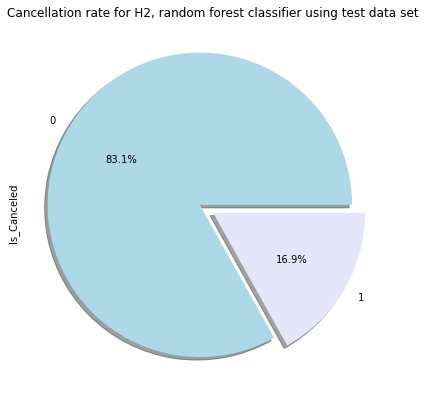

In [30]:
DC_pred = rf.predict(whatif_channel)
df = pd.DataFrame(data=DC_pred, columns=["Is_Canceled"])
df['Is_Canceled'].value_counts()
piedata = df['Is_Canceled'].value_counts()  # cancellation rate for pred based on test data set
my_colors = ['lightblue','lavender'] # custom colors
my_explode = (0.1,0) # custom effects
plt.figure(figsize=(7,7)) #custom size for the pie chart
piedata.plot.pie(autopct="%.1f%%",colors=my_colors,explode=my_explode,shadow=True) #pie chart creation
plt.title("Cancellation rate for H2, random forest classifier using test data set")
plt.show() # displaying only chart without the extra information

In [31]:
accuracy = metrics.accuracy_score(Y, DC_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.72%


In [32]:
whatif_paid = X.copy()
whatif_paid['deposit_type'].value_counts()

1    38199
2     1719
3      142
Name: deposit_type, dtype: int64

In [33]:
whatif_paid.loc[whatif_paid.deposit_type==1,"deposit_type"] = 1
whatif_paid.loc[whatif_paid.deposit_type==2,"deposit_type"] = 1
whatif_paid.loc[whatif_paid.deposit_type==3,"deposit_type"] = 1
whatif_paid['deposit_type'].value_counts()


1    40060
Name: deposit_type, dtype: int64

In [34]:
#whatif_paid=whatif_paid.astype({"deposit_type": int})
whatif_paid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40060 entries, 0 to 40059
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       40060 non-null  int64  
 1   arrival_date_year               40060 non-null  int64  
 2   arrival_date_month              40060 non-null  int64  
 3   arrival_date_week_number        40060 non-null  int64  
 4   stays_in_weekend_nights         40060 non-null  int64  
 5   stays_in_week_nights            40060 non-null  int64  
 6   adults                          40060 non-null  int64  
 7   children                        40060 non-null  float64
 8   babies                          40060 non-null  int64  
 9   meal                            40060 non-null  int64  
 10  market_segment                  40060 non-null  int64  
 11  distribution_channel            40060 non-null  int64  
 12  is_repeated_guest               

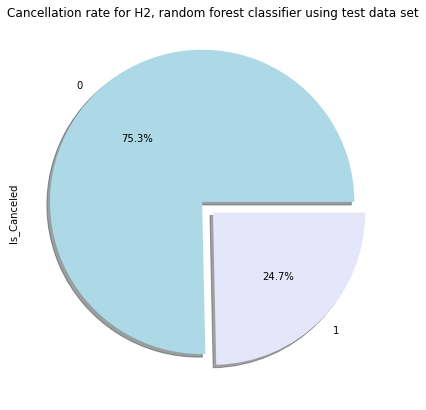

In [35]:
DT_pred = rf.predict(whatif_paid)
df = pd.DataFrame(data=DT_pred, columns=["Is_Canceled"])
df['Is_Canceled'].value_counts()
piedata = df['Is_Canceled'].value_counts()  # cancellation rate for pred based on test data set
my_colors = ['lightblue','lavender'] # custom colors
my_explode = (0.1,0) # custom effects
plt.figure(figsize=(7,7)) #custom size for the pie chart
piedata.plot.pie(autopct="%.1f%%",colors=my_colors,explode=my_explode,shadow=True) #pie chart creation
plt.title("Cancellation rate for H2, random forest classifier using test data set")
plt.show() # displaying only chart without the extra information

In [36]:
accuracy = metrics.accuracy_score(Y, DT_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.67%


In [43]:
whatif_guest = X.copy()

whatif_guest['is_repeated_guest'].value_counts()

0    38282
1     1778
Name: is_repeated_guest, dtype: int64

In [44]:
whatif_guest.loc[whatif_guest.is_repeated_guest==0,"is_repeated_guest"] = 1
whatif_guest['is_repeated_guest'].value_counts()

1    40060
Name: is_repeated_guest, dtype: int64

In [45]:
whatif_guest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40060 entries, 0 to 40059
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       40060 non-null  int64  
 1   arrival_date_year               40060 non-null  int64  
 2   arrival_date_month              40060 non-null  int64  
 3   arrival_date_week_number        40060 non-null  int64  
 4   stays_in_weekend_nights         40060 non-null  int64  
 5   stays_in_week_nights            40060 non-null  int64  
 6   adults                          40060 non-null  int64  
 7   children                        40060 non-null  float64
 8   babies                          40060 non-null  int64  
 9   meal                            40060 non-null  int64  
 10  market_segment                  40060 non-null  int64  
 11  distribution_channel            40060 non-null  int64  
 12  is_repeated_guest               

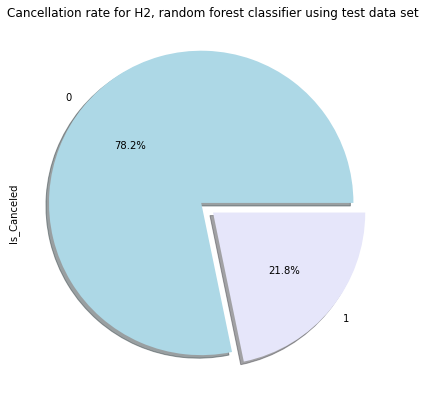

In [46]:
guest_pred = rf.predict(whatif_guest)
df = pd.DataFrame(data=guest_pred, columns=["Is_Canceled"])
df['Is_Canceled'].value_counts()
piedata = df['Is_Canceled'].value_counts()  # cancellation rate for pred based on test data set
my_colors = ['lightblue','lavender'] # custom colors
my_explode = (0.1,0) # custom effects
plt.figure(figsize=(7,7)) #custom size for the pie chart
piedata.plot.pie(autopct="%.1f%%",colors=my_colors,explode=my_explode,shadow=True) #pie chart creation
plt.title("Cancellation rate for H2, random forest classifier using test data set")
plt.show() # displaying only chart without the extra information

In [47]:
accuracy = metrics.accuracy_score(Y, guest_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.99%


In [48]:
whatif_can = X.copy()
whatif_can['previous_cancellations'].value_counts()

0     38965
1       896
24       48
2        44
26       26
25       25
19       19
14       14
3        14
4         6
5         3
Name: previous_cancellations, dtype: int64

In [49]:
whatif_can.loc[whatif_can.previous_cancellations!=0,"previous_cancellations"] = 0
whatif_can['previous_cancellations'].value_counts()

0    40060
Name: previous_cancellations, dtype: int64

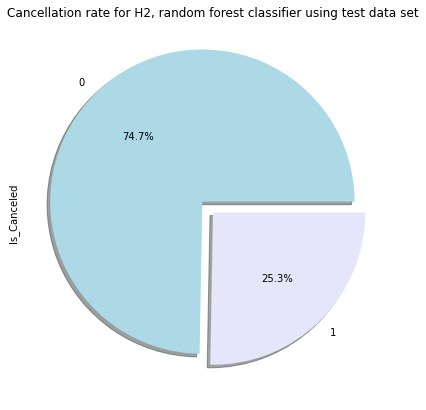

In [50]:
prevcan_pred = rf.predict(whatif_can)
df = pd.DataFrame(data=prevcan_pred, columns=["Is_Canceled"])
df['Is_Canceled'].value_counts()
piedata = df['Is_Canceled'].value_counts()  # cancellation rate for pred based on test data set
my_colors = ['lightblue','lavender'] # custom colors
my_explode = (0.1,0) # custom effects
plt.figure(figsize=(7,7)) #custom size for the pie chart
piedata.plot.pie(autopct="%.1f%%",colors=my_colors,explode=my_explode,shadow=True) #pie chart creation
plt.title("Cancellation rate for H2, random forest classifier using test data set")
plt.show() # displaying only chart without the extra information

In [51]:
accuracy = metrics.accuracy_score(Y, prevcan_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.36%


In [52]:
whatif_channel_corp = X.copy()
whatif_channel_corp['distribution_channel'].value_counts()

4    28925
2     7865
1     3269
5        1
Name: distribution_channel, dtype: int64

In [53]:
whatif_channel_corp.loc[whatif_channel_corp.distribution_channel==1,"distribution_channel"] = 1
whatif_channel_corp.loc[whatif_channel_corp.distribution_channel==2,"distribution_channel"] = 1
#whatif_channel_corp.loc[whatif_channel_corp.distribution_channel==3,"distribution_channel"] = 1
whatif_channel_corp.loc[whatif_channel_corp.distribution_channel==4,"distribution_channel"] = 1
whatif_channel_corp.loc[whatif_channel_corp.distribution_channel==5,"distribution_channel"] = 1

whatif_channel_corp['distribution_channel'].value_counts()

1    40060
Name: distribution_channel, dtype: int64

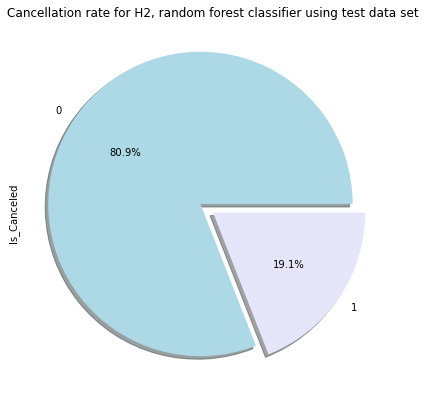

In [54]:
DC_corp_pred = rf.predict(whatif_channel_corp)
df = pd.DataFrame(data=DC_corp_pred, columns=["Is_Canceled"])
df['Is_Canceled'].value_counts()
piedata = df['Is_Canceled'].value_counts()  # cancellation rate for pred based on test data set
my_colors = ['lightblue','lavender'] # custom colors
my_explode = (0.1,0) # custom effects
plt.figure(figsize=(7,7)) #custom size for the pie chart
piedata.plot.pie(autopct="%.1f%%",colors=my_colors,explode=my_explode,shadow=True) #pie chart creation
plt.title("Cancellation rate for H2, random forest classifier using test data set")
plt.show() # displaying only chart without the extra information

In [55]:
accuracy = metrics.accuracy_score(Y, DC_corp_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.95%


In [56]:
whatif_spl = X.copy()
whatif_spl['total_of_special_requests'].value_counts()

0    22361
1    11806
2     4827
3      910
4      142
5       14
Name: total_of_special_requests, dtype: int64

In [57]:
whatif_spl.loc[whatif_spl.total_of_special_requests==1,"total_of_special_requests"] = 5
whatif_spl.loc[whatif_spl.total_of_special_requests==2,"total_of_special_requests"] = 5
whatif_spl.loc[whatif_spl.total_of_special_requests==3,"total_of_special_requests"] = 5
whatif_spl.loc[whatif_spl.total_of_special_requests==4,"total_of_special_requests"] = 5
#whatif_spl.loc[whatif_spl.total_of_special_requests==5,"total_of_special_requests"] = 5
whatif_spl.loc[whatif_spl.total_of_special_requests==0,"total_of_special_requests"] = 5

whatif_spl['total_of_special_requests'].value_counts()

5    40060
Name: total_of_special_requests, dtype: int64

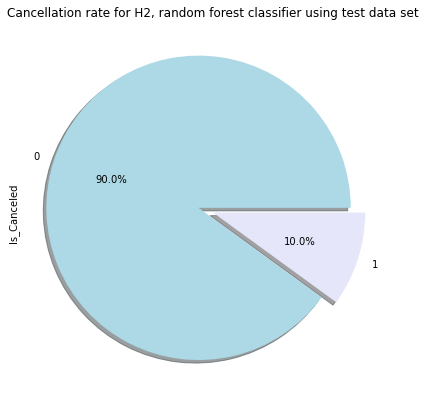

In [58]:
spl_pred = rf.predict(whatif_spl)
df = pd.DataFrame(data=spl_pred, columns=["Is_Canceled"])
df['Is_Canceled'].value_counts()
piedata = df['Is_Canceled'].value_counts()  # cancellation rate for pred based on test data set
my_colors = ['lightblue','lavender'] # custom colors
my_explode = (0.1,0) # custom effects
plt.figure(figsize=(7,7)) #custom size for the pie chart
piedata.plot.pie(autopct="%.1f%%",colors=my_colors,explode=my_explode,shadow=True) #pie chart creation
plt.title("Cancellation rate for H2, random forest classifier using test data set")
plt.show() # displaying only chart without the extra information

In [59]:
accuracy = metrics.accuracy_score(Y, spl_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 81.84%


In [60]:
whatif_car = X.copy()
whatif_car['required_car_parking_spaces'].value_counts()

0    34570
1     5462
2       25
8        2
3        1
Name: required_car_parking_spaces, dtype: int64

In [61]:
whatif_car.loc[whatif_car.required_car_parking_spaces==0,"required_car_parking_spaces"] = 1
whatif_car.loc[whatif_car.required_car_parking_spaces==2,"required_car_parking_spaces"] = 1
whatif_car.loc[whatif_car.required_car_parking_spaces==3,"required_car_parking_spaces"] = 1
whatif_car.loc[whatif_car.required_car_parking_spaces==8,"required_car_parking_spaces"] = 1
whatif_car['required_car_parking_spaces'].value_counts()

1    40060
Name: required_car_parking_spaces, dtype: int64

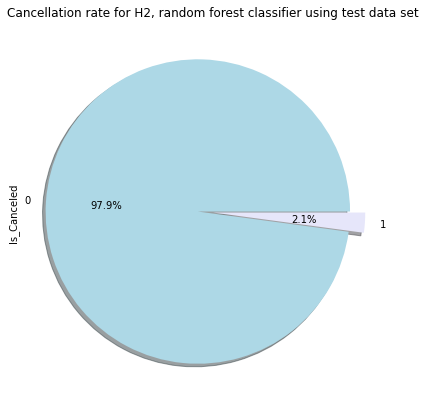

In [62]:
car_pred = rf.predict(whatif_car)
df = pd.DataFrame(data=car_pred, columns=["Is_Canceled"])
df['Is_Canceled'].value_counts()
piedata = df['Is_Canceled'].value_counts()  # cancellation rate for pred based on test data set
my_colors = ['lightblue','lavender'] # custom colors
my_explode = (0.1,0) # custom effects
plt.figure(figsize=(7,7)) #custom size for the pie chart
piedata.plot.pie(autopct="%.1f%%",colors=my_colors,explode=my_explode,shadow=True) #pie chart creation
plt.title("Cancellation rate for H2, random forest classifier using test data set")
plt.show() # displaying only chart without the extra information

In [63]:
accuracy = metrics.accuracy_score(Y, car_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.36%
